In [1]:
# pip install keras-self-attention
import os, time, gc, sys, io, pdb
import datetime, keras, pickle
import warnings, random, statistics
#
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot
import statistics as sts
#
from scipy import stats
from pandas import Series
from matplotlib.ticker import MultipleLocator, ScalarFormatter
#
# tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

2024-05-01 19:10:50.055408: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 19:10:50.121550: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 19:10:51.299737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def load_output_preprocessed_data(path, win, tr_tst, k, mld, multi):
        '''
        Returns the preprocessed data as a list of objects
        
        Arguments:
        path - path to the preprocessed data
        win - window size
        multi - boolean value to indicate if the data is multivariate or not
        '''

        if multi == False:
            fdat = f'/home/vvallejo/Finance-AI/dataprocessed/output/{win}/{tr_tst}/prueba-{mld}-output.pkl'

        else:
            fdat = f'/home/vvallejo/Finance-AI/dataprocessed/output/{win}/{tr_tst}/prueba-{mld}-m-output.pkl'

        with (open(fdat, "rb")) as openfile:
            while True:
                try:
                    path      = pickle.load(openfile)
                    fdat     = pickle.load(openfile)
                    lahead    = pickle.load(openfile)
                    lpar      =pickle.load(openfile)
                    tot_res   = pickle.load(openfile)
                except EOFError:
                    break
        return path, fdat, lahead, lpar, tot_res

In [4]:
tr_tst = 0.7
processed_path = f"/home/vvallejo/Finance-AI/dataprocessed/{tr_tst}"
win_size = 5
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar

In [6]:
tot_res['OUT_MODEL']['scenario_1']['AVGO'].keys()

dict_keys([1, 7, 14, 30, 90])

In [7]:
tot_res['OUT_MODEL']['scenario_1']['AAPL'][1].keys()

Index(['MSEP', 'MSEY', 'Stock', 'DY', 'ALG', 'seed', 'epochs', 'nhn', 'win',
       'ndims', 'lossh', 'nit', 'model', 'ttrain', 'bsize', 'tr_tst',
       'transformer_parameters'],
      dtype='object')

In [25]:
tot_res['INPUT_DATA'][1].keys()

dict_keys(['x', 'y', 'nx', 'ny', 'numt', 'trainX', 'trainY', 'testX', 'testY', 'vdd'])

In [13]:
tot_res['OUT_MODEL']['scenario_1'].keys()

dict_keys(['AAPL', 'ADBE', 'AMZN', 'AVGO', 'CMCSA'])

In [15]:
res1 = tot_res['OUT_MODEL']
stck = 'AVGO'
ahead= 1
itr  = 0
DYs  = res1['scenario_1'][stck][ahead]['DY']
DY   = DYs.loc[itr]

In [17]:
DY/100000

,Y_real,Y_predicted,Y_yesterday
date,,,
2022-03-04,44.76193,47.005190,26.45397
2022-03-07,26.49363,47.302325,44.76193
2022-03-08,26.99261,47.721711,26.49363
2022-03-09,22.56049,47.880030,26.99261
2022-03-10,19.32364,-120.840460,22.56049
...,...,...,...
2023-12-20,34.52335,80.585869,36.02040
2023-12-21,24.10561,72.013655,34.52335
2023-12-22,19.08897,52.122803,24.10561


In [19]:
res1['scenario_1'][stck][ahead]['DY'][0].shape

(448, 3)

In [24]:
print(res1['scenario_1'][stck][ahead]['MSEY'])
print(res1['scenario_1'][stck][ahead]['MSEP'])

0    1.701275e+12
1    1.701275e+12
2    1.701275e+12
3    1.701275e+12
4    1.701275e+12
5    1.701275e+12
6    1.701275e+12
7    1.701275e+12
8    1.701275e+12
9    1.701275e+12
Name: MSEY, dtype: float64
0    1.501414e+13
1    1.171986e+13
2    1.150141e+13
3    1.303288e+13
4    1.383495e+13
5    1.012336e+13
6    1.559987e+13
7    1.537575e+13
8    1.040466e+13
9    1.092296e+13
Name: MSEP, dtype: float64


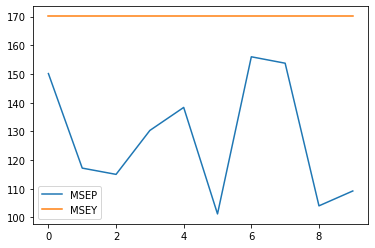

In [27]:
plt.plot(res1['scenario_1'][stck][ahead]['MSEP']/100000000000, label='MSEP')
plt.plot(res1['scenario_1'][stck][ahead]['MSEY']/10000000000, label='MSEY')
plt.legend()
plt.show()

15014138667482.05
23078270348210.086


"path = f'D:\\Escritorio\\TFG\\Finance-AI\\Figures/{tr_tst}/'\nif not os.path.exists(path):\n    os.makedirs(path)\n\nplt.tight_layout()\n#plt.show()\nfigfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)\nplt.savefig(figfich)\n"

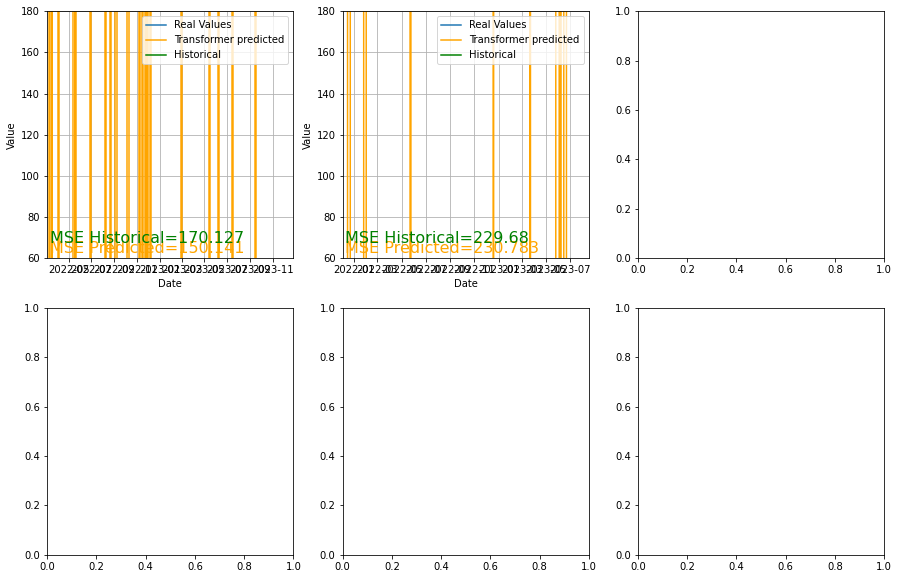

In [28]:
tr_tst = 0.7
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 5
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep/100000000000,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey/10000000000,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_1']['AVGO']
    mdl = 'transformer'
    stck = 'AVGO'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 180)

'''path = f'D:\Escritorio\TFG\Finance-AI\Figures/{tr_tst}/'
if not os.path.exists(path):
    os.makedirs(path)

plt.tight_layout()
#plt.show()
figfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)
plt.savefig(figfich)
'''

24.893
18.424
15.561
16.557
17.895


"path = f'D:\\Escritorio\\TFG\\Finance-AI\\Figures/{tr_tst}/'\nif not os.path.exists(path):\n    os.makedirs(path)\n\nplt.tight_layout()\n#plt.show()\nfigfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)\nplt.savefig(figfich)\n"

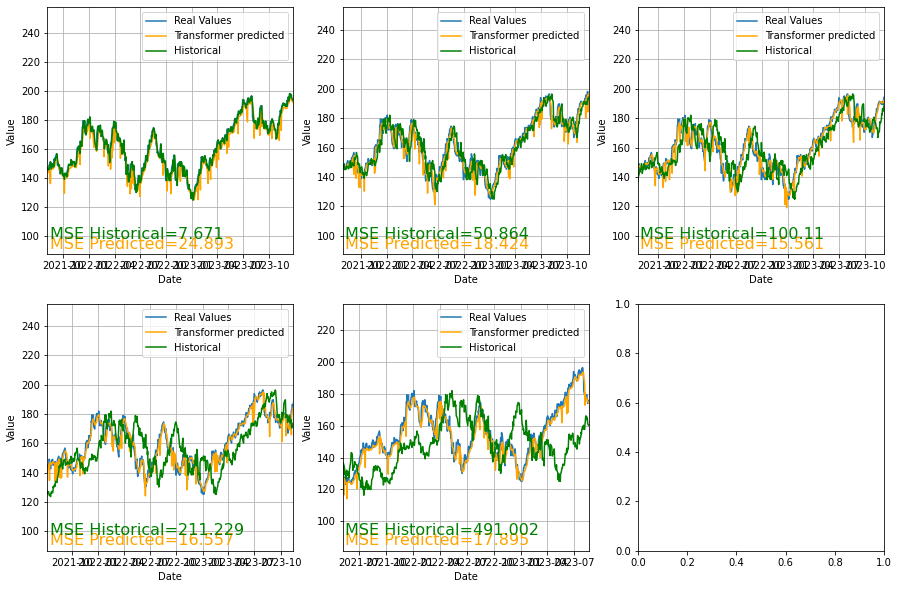

In [51]:
tr_tst = 0.7
processed_path = f"/home/vvallejo/Finance-AI/dataprocessed/{tr_tst}"
win_size = 5
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1,7, 14, 30, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_1']['AAPL']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(DY['Y_yesterday'].min()*0.7, DY['Y_yesterday'].max()*1.3)

'''path = f'D:\Escritorio\TFG\Finance-AI\Figures/{tr_tst}/'
if not os.path.exists(path):
    os.makedirs(path)

plt.tight_layout()
#plt.show()
figfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)
plt.savefig(figfich)
'''

175.952
297.888


"path = f'D:\\Escritorio\\TFG\\Finance-AI\\Figures/{tr_tst}/'\nif not os.path.exists(path):\n    os.makedirs(path)\n\nplt.tight_layout()\n#plt.show()\nfigfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)\nplt.savefig(figfich)\n"

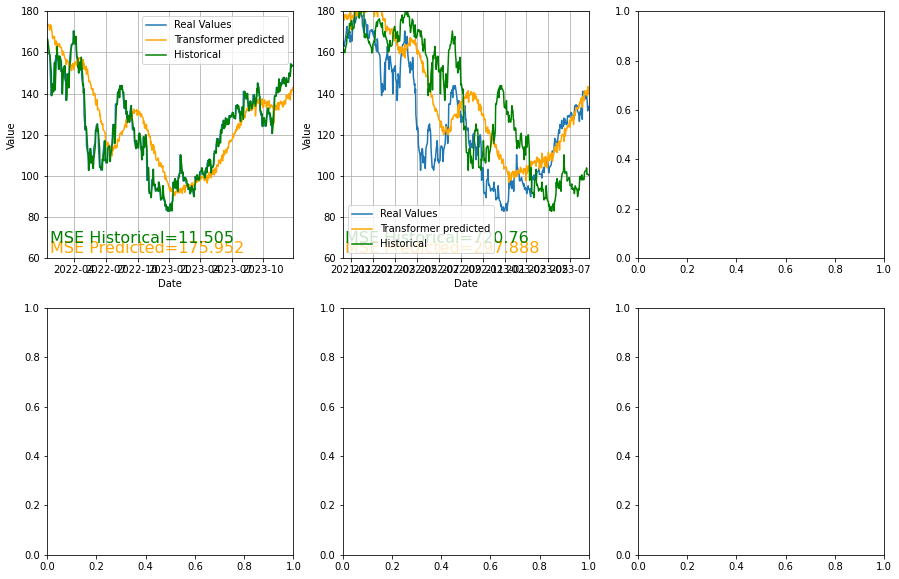

In [5]:
tr_tst = 0.75
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 50
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_2']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 180)

'''path = f'D:\Escritorio\TFG\Finance-AI\Figures/{tr_tst}/'
if not os.path.exists(path):
    os.makedirs(path)

plt.tight_layout()
#plt.show()
figfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)
plt.savefig(figfich)
'''

105.118
216.898


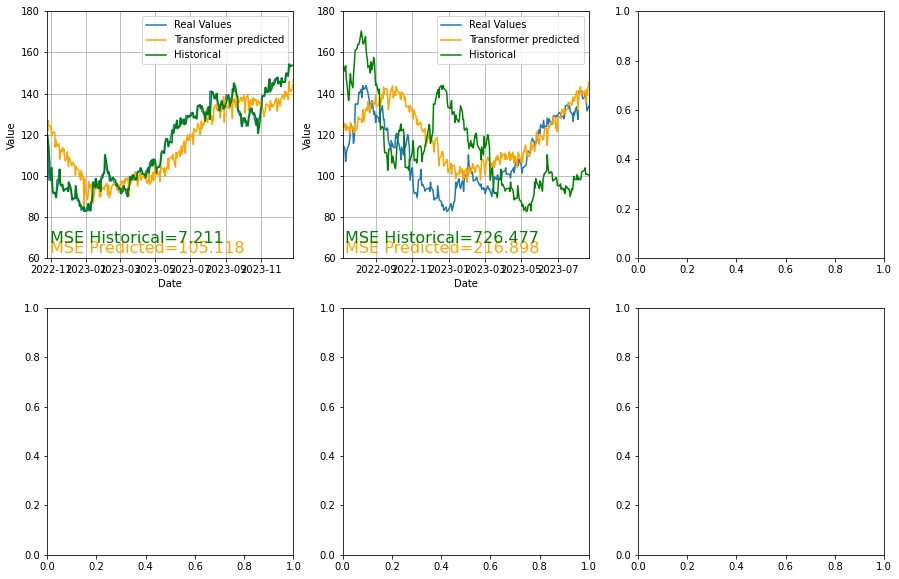

In [6]:
tr_tst = 0.85
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 50
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_2']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 180)

3.501
28.924


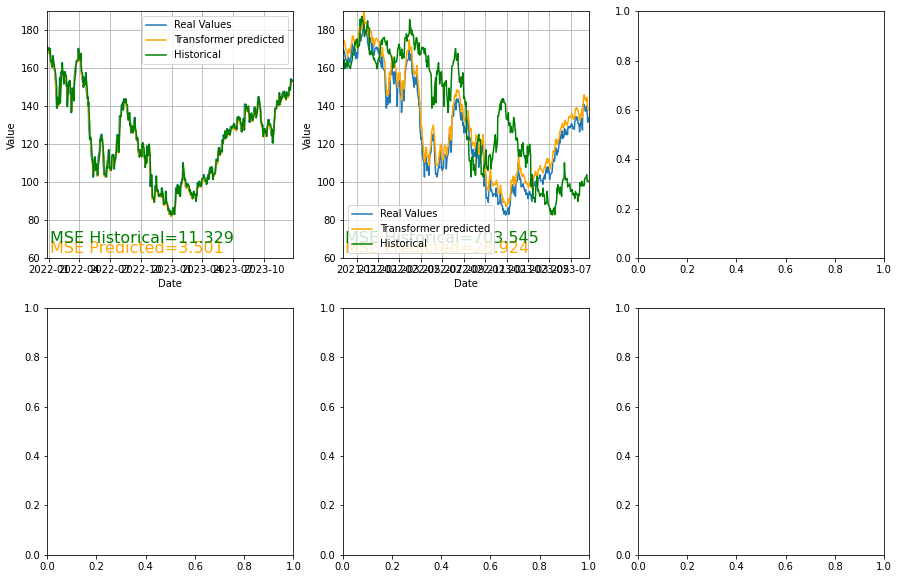

In [9]:
tr_tst = 0.75
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 2
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_3']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 190)

2.859
32.398


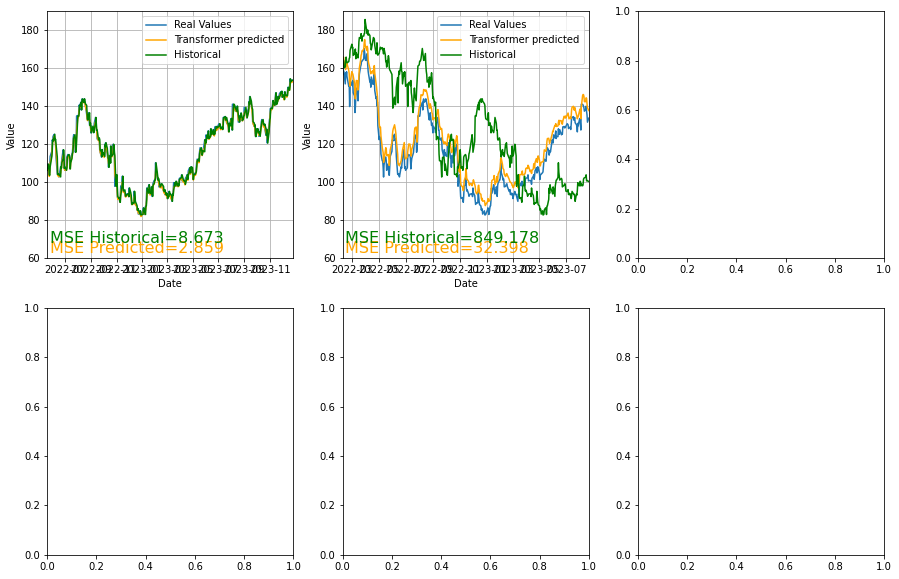

In [10]:
tr_tst = 0.8
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 2
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_3']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 190)

15.354
1032.974


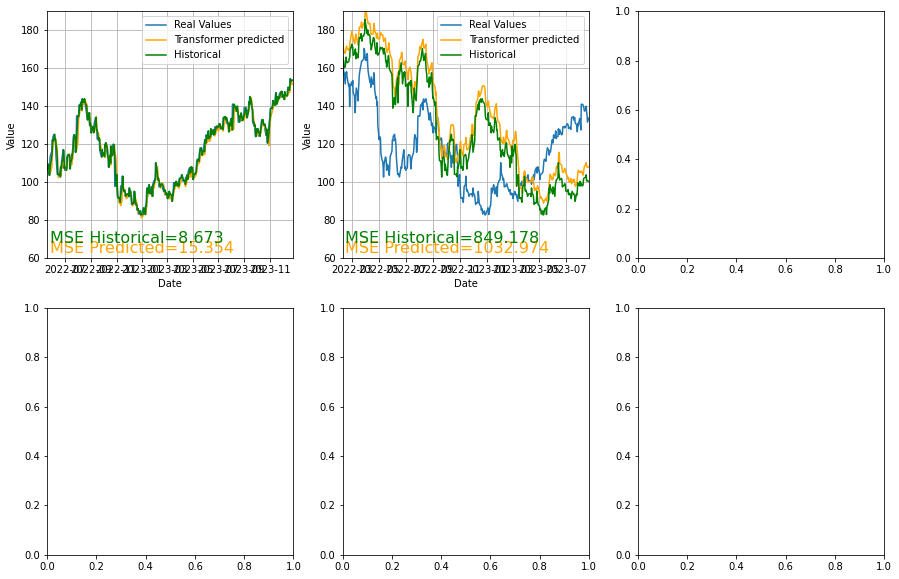

In [25]:
tr_tst = 0.8
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 2
k = 2
multi = True
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for k in [10]:
    for i, ahead in enumerate([1, 90]):
        res1 = tot_res['OUT_MODEL']['scenario_3'][k]['AMZN']
        mdl = 'transformer'
        stck = 'AMZN'
        itr = 0
        DYs = res1[ahead]['DY']
        DY = DYs.loc[itr]
        msep = res1[ahead]['MSEP'][itr]
        msey = res1[ahead]['MSEY'][itr]
        row = i // 3
        col = i % 3
        plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
        
        # Ajustar los límites del eje X y Y
        axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
        axs[row, col].set_ylim(60, 190)